Does Delaunay, tried to make something to check when there were clusters of data, decided that it wasn't really worth it.

In [53]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
import scipy.stats as scs # scipy stats to get distributions from
from pyvbmc.priors import UniformBox, Trapezoidal, SplineTrapezoidal, SmoothBox # nice priors from PyVBMC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import scipy.stats as scs
import scipy.integrate as integrate

import random

# from matplotlib.path import Path # unsure if this is needed
from numpy import asarray, concatenate, ones
import matplotlib.patches as patches # to make the polygon


import matplotlib.path as mplPath
import time

from scipy.spatial import Delaunay

from mpl_toolkits import mplot3d


%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D


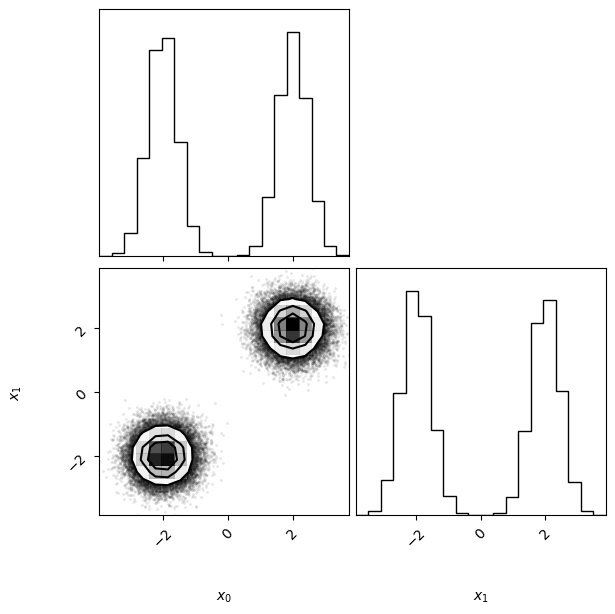

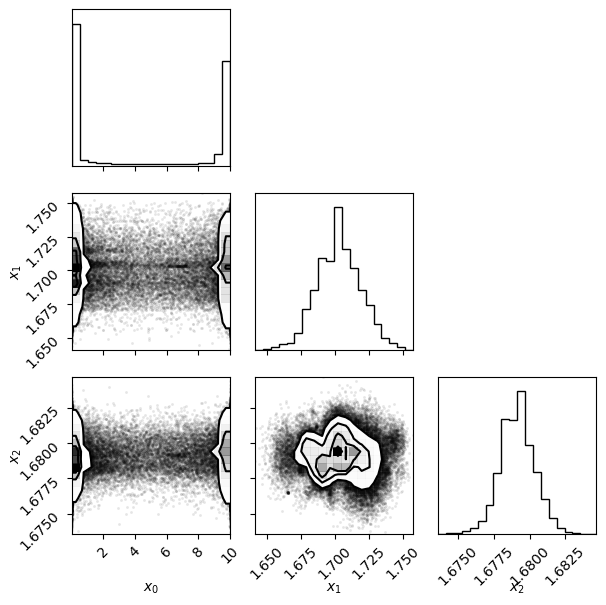

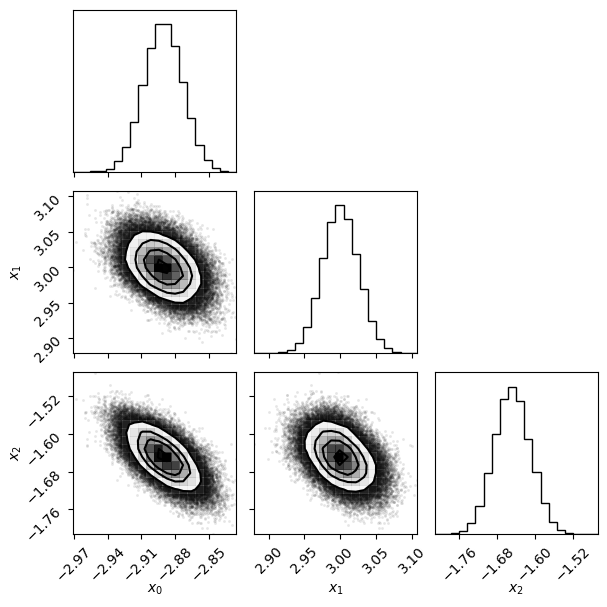

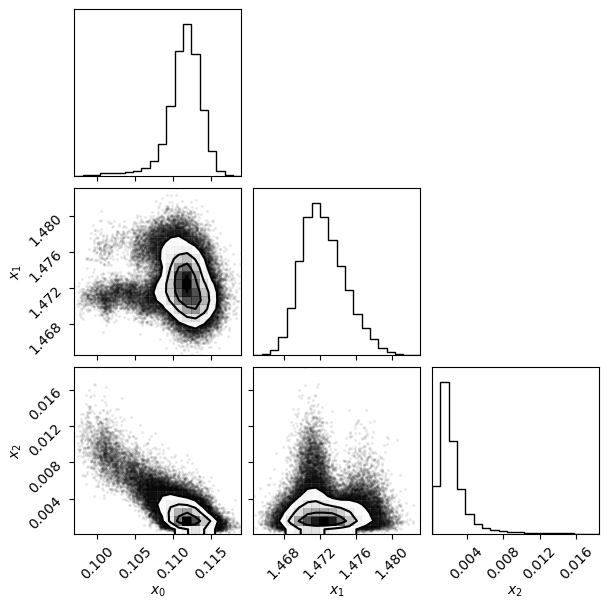

In [49]:
from pyvbmc import VariationalPosterior

doubly_peaked_vp = VariationalPosterior.load("doubly_peaked_vp.pkl")
D3_vp = VariationalPosterior.load('3D_vp.pkl')
better_d3_vp = VariationalPosterior.load('3d_vp_reasonable.pkl')
cool_vp = VariationalPosterior.load('wild_and_wacky_3d_vp.pkl')
new_vp = VariationalPosterior.load("3d_for_plotting_vp.pkl")


doubly_peaked_vp.plot()
D3_vp.plot()
better_d3_vp.plot()
cool_vp.plot()

true_a_b = [[-2.,-2.],[2.,2.]]
true_3d = [[np.pi/2, 2., 2.], [np.pi**2, 2., 2.]]
true_b_3d = [-2.89037176, 3., -1.64865863]
true_cool_3d = [1.,1.,1.]
true_new = [1.,1.,1.]

In [3]:
def samples_above_threshold(vp, true_value, n_samples): # change to a while loop
    if len(true_value) > 1:
        threshold = min(vp.pdf(np.array(true_value)))
    else:
        threshold = vp.pdf(true_value)
        # for value in true_value:
        #     if true_thresh == vp.pdf(value):
        #         true_value 
        
    # threshold = vp.pdf(true_value) # find the pdf of our true value
    threshold_edited = threshold*.75
    Xs, _ = vp.sample(n_samples * 5) # get samples out of the distribution
    pdfs = vp.pdf(Xs) # find the pdf of each of those samples
    # pdfs_copy = np.copy(pdfs.tolist())    

    high_threshold_samples = []

    for i in range(len(pdfs)):
        if pdfs[i] >= threshold_edited and len(high_threshold_samples) <= n_samples:
            high_threshold_samples.append(Xs[i])
            if len(high_threshold_samples) == n_samples:
                break

    return np.array(high_threshold_samples)

In [4]:
X, _ = doubly_peaked_vp.sample(int(2e3))
print(doubly_peaked_vp.pdf(X))
print(doubly_peaked_vp.pdf([-2.,-2.]))

[[0.22413438]
 [0.33871943]
 [0.29189984]
 ...
 [0.33298372]
 [0.18903996]
 [0.31496734]]
[0.40337579]


What to do when there are actually two true values?
- right now i'm just taking the lower pdf of the two

In [5]:
thresh_samp = samples_above_threshold(doubly_peaked_vp, true_a_b, int(5e5))

In [6]:
thresh_samp_3D = samples_above_threshold(D3_vp, true_3d, int(5e5))
# print(thresh_samp_3D)

/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/pyvbmc/variational_posterior/variational_posterior.py:555: RuntimeWarning: overflow encountered in divide
  y[mask] /= np.exp(


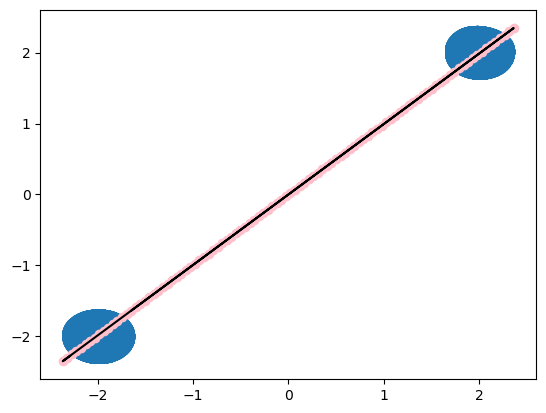

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
xs, ys = thresh_samp[:,0], thresh_samp[:,1]
ax.scatter(xs,ys, s=.1)
m, n = np.polyfit(np.array(xs), np.array(ys), 1)
new_y = m * xs + n
ax.plot(xs, new_y, color='black')

xmin, xmax = min(thresh_samp[:,0]), max(thresh_samp[:,0])
ymin, ymax = m * xmin + n, m * xmax + n

nx, ny = (100, 100)
x_coord = np.linspace(xmin, xmax, nx)

points_ = []
for i in x_coord:
    points_.append([i, m*i+n])

point = np.array(points_)
ax.scatter(point[:,0], point[:,1], color="pink")

# plt.scatter(thresh_samp[:,0], thresh_samp[:,1], color = 'b', s=.1)


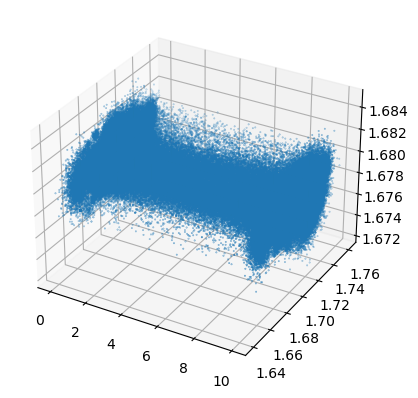

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs, ys, zs = thresh_samp_3D[:,0], thresh_samp_3D[:,1], thresh_samp_3D[:,2]
ax.scatter(xs, ys, zs, s=.1)

Now I want to make something that checks whether or not the data has multiple peaks.

In [9]:
doubly_peaked_vp.pdf([[2,2], [-2,-2]])

array([[2.85916102e-07],
       [2.85916102e-07]])

In [10]:
m, n = np.polyfit(np.array(thresh_samp[:,0]), np.array(thresh_samp[:,1]), 1)
xmin, xmax = min(thresh_samp[:,0]), max(thresh_samp[:,0])

nx = 100
x_coord = np.linspace(xmin, xmax, nx)

points_ = []
for i in x_coord:
    points_.append([i, m*i+n])

print(np.array(points_))

doubly_peaked_vp.pdf(np.array(points_))


[[-2.3669361  -2.35556446]
 [-2.31916125 -2.30805964]
 [-2.27138639 -2.26055483]
 [-2.22361153 -2.21305001]
 [-2.17583667 -2.16554519]
 [-2.12806182 -2.11804037]
 [-2.08028696 -2.07053555]
 [-2.0325121  -2.02303074]
 [-1.98473725 -1.97552592]
 [-1.93696239 -1.9280211 ]
 [-1.88918753 -1.88051628]
 [-1.84141268 -1.83301146]
 [-1.79363782 -1.78550665]
 [-1.74586296 -1.73800183]
 [-1.6980881  -1.69049701]
 [-1.65031325 -1.64299219]
 [-1.60253839 -1.59548737]
 [-1.55476353 -1.54798256]
 [-1.50698868 -1.50047774]
 [-1.45921382 -1.45297292]
 [-1.41143896 -1.4054681 ]
 [-1.3636641  -1.35796328]
 [-1.31588925 -1.31045847]
 [-1.26811439 -1.26295365]
 [-1.22033953 -1.21544883]
 [-1.17256468 -1.16794401]
 [-1.12478982 -1.1204392 ]
 [-1.07701496 -1.07293438]
 [-1.0292401  -1.02542956]
 [-0.98146525 -0.97792474]
 [-0.93369039 -0.93041992]
 [-0.88591553 -0.88291511]
 [-0.83814068 -0.83541029]
 [-0.79036582 -0.78790547]
 [-0.74259096 -0.74040065]
 [-0.6948161  -0.69289583]
 [-0.64704125 -0.64539102]
 

array([[2.06111258e-01],
       [2.42333126e-01],
       [2.78824540e-01],
       [3.13839862e-01],
       [3.45436703e-01],
       [3.71653273e-01],
       [3.90724065e-01],
       [4.01296960e-01],
       [4.02608822e-01],
       [3.94583280e-01],
       [3.77832046e-01],
       [3.53563483e-01],
       [3.23421610e-01],
       [2.89289584e-01],
       [2.53092410e-01],
       [2.16626381e-01],
       [1.81431778e-01],
       [1.48714615e-01],
       [1.19315117e-01],
       [9.37156708e-02],
       [7.20787296e-02],
       [5.43045348e-02],
       [4.00989101e-02],
       [2.90424305e-02],
       [2.06538441e-02],
       [1.44426610e-02],
       [9.94813079e-03],
       [6.76408299e-03],
       [4.55098998e-03],
       [3.03785850e-03],
       [2.01709418e-03],
       [1.33538428e-03],
       [8.83107707e-04],
       [5.84041960e-04],
       [3.86397929e-04],
       [2.55607648e-04],
       [1.68873075e-04],
       [1.11249376e-04],
       [7.29443249e-05],
       [4.75156347e-05],


In [11]:
def minkowskiDist(v1, v2):
    #Assumes v1 and v2 are equal length arrays of numbers
    dist = 0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**2
    return dist**(1/2)

In [12]:
class Example(object):
    
    def __init__(self, features):
        #Assumes features is an array of floats
        self.features = features

    def dimensionality(self):
        return len(self.features)

    def getFeatures(self):
        # print(self.features[:])
        return self.features[:]
    
    def distance(self, other):
        return minkowskiDist(self.features, other.getFeatures())

In [13]:
class Cluster(object):
    
    def __init__(self, examples):
        """Assumes examples a non-empty list of Examples"""
        self.examples = examples
        self.centroid = self.computeCentroid()
        
    def update(self, examples):
        """Assume examples is a non-empty list of Examples
           Replace examples; return amount centroid has changed"""
        oldCentroid = self.centroid
        self.examples = examples
        self.centroid = self.computeCentroid()
        return oldCentroid.distance(self.centroid)
    
    def computeCentroid(self):
        vals = np.array([0.0]*self.examples[0].dimensionality())
        for e in self.examples: #compute mean
            vals += e.getFeatures()
        # centroid = Example('centroid', vals/
        #     len(self.examples),self.examples[0].getFeatureNames())
        centroid = Example(vals/ len(self.examples))
        return centroid

    def getCentroid(self):
        return self.centroid

    def inertia(self):
        totDist = 0
        for e in self.examples:
            totDist += (e.distance(self.centroid))**2
        return totDist
        
    def members(self):
        for e in self.examples:
            yield e

    # def __str__(self):
    #     names = []
    #     for e in self.examples:
    #         names.append(e.getName())
    #     names.sort()
    #     result = ('Cluster with centroid '
    #            + str(self.centroid.getFeatures()) + ' contains:\n  ')
    #     for e in names:
    #         result = result + e + ', '
    #     return result[:-2] #remove trailing comma and space    

In [14]:
def kmeans(examples, k, verbose = False):
    #Get k randomly chosen initial centroids, create cluster for each
    initialCentroids = random.sample(examples, k)
    clusters = []
    for e in initialCentroids:
        clusters.append(Cluster([e]))
        
    #Iterate until centroids do not change
    converged = False
    numIterations = 0
    while not converged:
        numIterations += 1
        #Create a list containing k distinct empty lists
        newClusters = []
        for i in range(k):
            newClusters.append([])
            
        #Associate each example with closest centroid
        for e in examples:
            #Find the centroid closest to e
            smallestDistance = e.distance(clusters[0].getCentroid())
            index = 0
            for i in range(1, k):
                distance = e.distance(clusters[i].getCentroid())
                if distance < smallestDistance:
                    smallestDistance = distance
                    index = i
            #Add e to the list of examples for appropriate cluster
            newClusters[index].append(e)

        for c in newClusters: #Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')
        
        #Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(newClusters[i]) > 0.0:
                converged = False
        #plotClusters(clusters)
        if verbose:
            print('Iteration #' + str(numIterations))
            for c in clusters:
                print(c)
            print('') #add blank line

    return clusters

In [15]:
def totalInertia(clusters):
    """Assumes clusters a list of clusters
       Returns a measure of the total dissimilarity of the
       clusters in the list"""
    totDist = 0
    for c in clusters:
        totDist += c.inertia()
    return totDist

In [16]:
def trykmeans(examples, numClusters, numTrials, verbose = False):
    """Calls kmeans numTrials times and returns the result with the
          lowest dissimilarity"""
    best = kmeans(examples, numClusters, verbose)
    trial = 1
    while trial < numTrials:
        try:
            clusters = kmeans(examples, numClusters, verbose)
        except ValueError:
            continue #If failed, try again
        if totalInertia(clusters) < totalInertia(best):
            best = clusters
        trial += 1
    return best

In [17]:
def getData2Features(pts):
    #read in data
    # pts = pointy
    # print(df) ###
    points = []
    for i in range(len(pts)):
        points.append(Example(np.array([pts[i][0],pts[i][1]])))
        # features=np.array([pts[i][0],pts[i][1]])
        # # print(features)
        # points.append(Example(features))
    return points

In [18]:
def getDataFeatures(pts):
    # pts = pointy
    points = []
    dim = len(pts[0])

    for i in range(len(pts)):
        point = []
        for j in range(dim):
            point.append(pts[i][j])
        
        points.append(Example(np.array(point)))
    return points

In [19]:
# thresh_samp = samples_above_threshold(doubly_peaked_vp, true_a_b, int(5e5))
# try1 = getDataFeatures(thresh_samp)
# try_k = trykmeans(try1, 2, 10)

In [20]:
thresh_samp_3d = samples_above_threshold(D3_vp, true_3d, int(2e3))
print(len(thresh_samp_3d[0]))
try1_3d = getDataFeatures(thresh_samp_3d)
try_k_3d = trykmeans(try1_3d, 2, 5)

3


In [22]:
# def check_cluster(samp):

#     for i in range(len(samp[0])):
        
        

#     m, n = np.polyfit(np.array(samp[:,0]), np.array(samp[:,1]), 1)
#     xmin, xmax = min(thresh_samp[:,0]), max(thresh_samp[:,0])

#     nx = 100
#     x_coord = np.linspace(xmin, xmax, nx)

#     points_ = []
#     for i in x_coord:
#         points_.append([i, m*i+n])


In [23]:
def get_cluster_points(try_kmeans):
    try_k = try_kmeans
    all_clusters = []
    for cluster in try_k:
        cluster_pts = []
        examples_cluster = cluster.examples
        for examp in examples_cluster:
            cluster_pts.append(examp.getFeatures())
        all_clusters.append(np.array(cluster_pts))
    return all_clusters

In [24]:
cluster_all_3d = get_cluster_points(try_k_3d)

In [25]:
# # colors = ['b','g','r','c','m','y','k','orange','purple','brown','pink','gray']
# colors = ['b','g']

# for i in range(len(cluster_all)):
#     # plt.scatter(cluster_all[i][:,0], cluster_all[i][:,1], color=colors[i], s=.1)
#     plt.scatter(cluster_all[i][:,0], cluster_all[i][:,1], color='b', s=.1)
#     tri = Delaunay(cluster_all[i])
#     # plt.triplot(cluster_all[i][:,0], cluster_all[i][:,1], tri.simplices, color= colors[-i], lw=.1)
#     plt.triplot(cluster_all[i][:,0], cluster_all[i][:,1], tri.simplices, color= 'g', lw=.1)

# # plt.xlim(.48,.485)
# # plt.ylim(1.465, 1.48)

In [26]:
# # colors = ['b','g','r','c','m','y','k','orange','purple','brown','pink','gray']
# colors = ['b','g']

# # fig = plt.figure()
# # ax = fig.add_subplot(projection='3d')

# for i in range(len(cluster_all_3d)):
    # plt.scatter(cluster_all[i][:,0], cluster_all[i][:,1], color=colors[i], s=.1)
    # plt.scatter(cluster_all_3d[i][:,0], cluster_all_3d[i][:,1], cluster_all_3d[i][:,2], color='b', s=.1)
    # tri = Delaunay(cluster_all_3d[i][:,0], cluster_all_3d[i][:,1], cluster_all_3d[i][:,2])
    # tri = Delaunay(cluster_all_3d[i])
    # tetramesh(tri)
    # plt.triplot(cluster_all[i][:,0], cluster_all[i][:,1], tri.simplices, color= colors[-i], lw=.1)
    # plt.triplot(cluster_all_3d[i][:,0], cluster_all_3d[i][:,1], cluster_all_3d[i][:,2], tri.simplices, color= 'g', lw=.1)
    # ax.plot_trisurf(cluster_all_3d[i][:,0], cluster_all_3d[i][:,1], cluster_all_3d[i][:,2], triangles=tri.triangles, lw=.1)

# plt.xlim(.48,.485)
# plt.ylim(1.465, 1.48)

In [27]:
th_samp_3d = samples_above_threshold(D3_vp, true_3d, int(2e3))
try2_3d = getDataFeatures(th_samp_3d)
try2_k_3d = trykmeans(try2_3d, 1, 5)

clust = get_cluster_points(try2_k_3d)

In [28]:
print(clust[0])
print(type(clust[0]))
print(clust[0].T)
print(type(clust[0].T))

[[3.45290218e-02 1.71520546e+00 1.67933866e+00]
 [8.80410615e-05 1.70458216e+00 1.67940791e+00]
 [1.76544141e+00 1.66539375e+00 1.67944306e+00]
 ...
 [9.99941512e+00 1.72539564e+00 1.67863620e+00]
 [6.46625069e-41 1.68824847e+00 1.67771099e+00]
 [9.99978235e+00 1.68486431e+00 1.68065498e+00]]
<class 'numpy.ndarray'>
[[3.45290218e-02 8.80410615e-05 1.76544141e+00 ... 9.99941512e+00
  6.46625069e-41 9.99978235e+00]
 [1.71520546e+00 1.70458216e+00 1.66539375e+00 ... 1.72539564e+00
  1.68824847e+00 1.68486431e+00]
 [1.67933866e+00 1.67940791e+00 1.67944306e+00 ... 1.67863620e+00
  1.67771099e+00 1.68065498e+00]]
<class 'numpy.ndarray'>


In [29]:
import plotly.graph_objects as go

# pts = np.loadtxt(np.DataSource().open('https://raw.githubusercontent.com/plotly/datasets/master/mesh_dataset.txt'))

print(type(clust))
pts = clust[0]

x, y, z = pts.T

tri = Delaunay(clust[0])
indices = tri.simplices

print(indices[:,0])
print(len(indices[:,0]))

vertices = clust[0][indices]

d = indices[:,0]
e = indices[:,1]
f = indices[:,2]


# print(vertices)
# # print('hit')
# # print(vertices[0][:,0])
# print(vertices[0])

i_ = []
j_ = []
k_ = []
colors = []
# print(vertices[:])
# print(vertices.flatten())

for l in range(len(indices[:,0])):
    # print(l.flatten())
    # print('hit')
    # i_.append(l[:,0])
    # j_.append(l[:,1])
    # k_.append(l[:,2])
    print(l%255)
    colors.append(((l+ 50)%255, l%255, (l+100)%255))

# i = np.array(i_).flatten()
# j = np.array(j_).flatten()
# k = np.array(k_).flatten()

# print(type(i))
# print(np.array(i_).flatten())
# print(len(np.array(i_).flatten()))
# print(vertices)
# # print(x)
# print(len(vertices)*4)

# print(vertices[:,1])
# i, j, k = vertices.T
# print(i)
# print(type(x))

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, i=d, j=e, k=f,
                   opacity=0.4, vertexcolor = colors)])

# # fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z,
# #                    alphahull=5, vertexcolor=colors,
# #                    opacity=0.4,
# #                    color='cyan')])

fig.show()

<class 'list'>
[1947  744 1417 ... 1268 1268 1268]
10554
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
0
1
2
3
4
5
6
7
8
9
10
11
12
13
1

In [30]:
# th_samp_3d = samples_above_threshold(D3_vp, true_3d, int(2e3))
# try2_3d = getDataFeatures(th_samp_3d)
# try2_k_3d = trykmeans(try2_3d, 2, 5)

# clust = get_cluster_points(try2_k_3d)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for i in range(len(clust)):
#     tri = Delaunay(clust[i])
#     mplot3d.Axes3D.plot_trisurf(clust[i][:,0], clust[i][:,1], clust[i][:,2], tri)

# # mplot3d.Axes3D.plot_trisurf()


In [31]:
def plot_tri_2(ax, points, tri):
    edges = collect_edges(tri)
    x = np.array([])
    y = np.array([])
    z = np.array([])
    for (i,j) in edges:
        x = np.append(x, [points[i, 0], points[j, 0], np.nan])      
        y = np.append(y, [points[i, 1], points[j, 1], np.nan])      
        z = np.append(z, [points[i, 2], points[j, 2], np.nan])
    ax.plot3D(x, y, z, color='g', lw='0.1')
    
    ax.scatter(points[:,0], points[:,1], points[:,2], color='b', s=1)


def collect_edges(tri):
    edges = set()

    def sorted_tuple(a,b):
        return (a,b) if a < b else (b,a)
    # Add edges of tetrahedron (sorted so we don't add an edge twice, even if it comes in reverse order).
    for (i0, i1, i2, i3) in tri.simplices:
        edges.add(sorted_tuple(i0,i1))
        edges.add(sorted_tuple(i0,i2))
        edges.add(sorted_tuple(i0,i3))
        edges.add(sorted_tuple(i1,i2))
        edges.add(sorted_tuple(i1,i3))
        edges.add(sorted_tuple(i2,i3))
    return edges

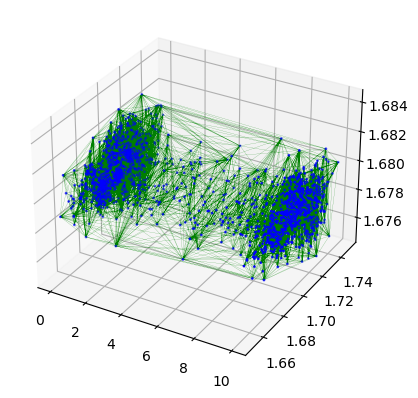

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# plot_tri(ax, points, tri)

for i in range(len(clust)):
    tri = Delaunay(clust[i])
    plot_tri_2(ax,clust[i],tri)
    

In [33]:
def get_Delaunay(vp, clusters):

    integrals = 0
    for i in range(len(clusters)):
        tri = Delaunay(clusters[i])
        indices = tri.simplices
        vertices = clusters[i][indices]
        # print(vertices)

        # integral = 0
        areas = []
        centroids = []

        for pnt in vertices:
            Ax, Ay, Bx, By, Cx, Cy = pnt[0][0], pnt[0][1], pnt[1][0], pnt[1][1], pnt[2][0], pnt[2][1]
            areas.append(abs(Ax*(By-Cy) + Bx*(Cy-Ay) + Cx*(Ay-By)))
            centroids.append([(Ax+Bx+Cx)/2, (Ay+By+Cy)/2])
            # pdf_centroid = vp.pdf([(Ax+Bx+Cx)/2, (Ay+By+Cy)/2])
            # integral += area * pdf_centroid

        pdfs = vp.pdf(centroids)

        integral = np.array(areas) @ pdfs


        # for i in range(len(centroids)):


        integrals += integral
    
    return integrals
    

In [34]:
# get_Delaunay(doubly_peaked_vp, cluster_all)

In [35]:
def deter(pnts):
    # print(pnts)
    v0 = np.array(pnts[0])
    n = len(pnts) - 1
    arry = []
    centroid = []
    # print(sum(pnts[:,2])/4)

    for i in range(n + 1):
        if i != n:
            centroid.append(sum(pnts[:,i]) / (n+1))
        if i == 0:
            continue
        arry.append(np.array(pnts[i]) - v0)

    arry_ = np.array(arry)
    # print(arry_)
    det = abs(np.linalg.det(arry_))
    # print(det)
    # print(np.math.factorial(n))
    # print(centroid)
    vol = det/np.math.factorial(n)

    return vol, centroid

In [36]:
Xs, _ = D3_vp.sample(int(2e3))
print(Xs)
D3_vp.pdf(Xs)

[[9.45211151e-04 1.70231609e+00 1.67877230e+00]
 [6.92896692e+00 1.70370892e+00 1.67862313e+00]
 [5.61128692e-17 1.69471283e+00 1.67836565e+00]
 ...
 [5.47165056e-39 1.69382887e+00 1.67787624e+00]
 [9.99410021e+00 1.72363388e+00 1.67778889e+00]
 [6.40794542e-03 1.69303268e+00 1.67770671e+00]]


array([[1.06678175e+05],
       [9.90174840e+01],
       [7.69326555e+17],
       ...,
       [1.99440728e+39],
       [3.59452495e+03],
       [1.84011584e+04]])

In [37]:
def get_Delaunay_integral_n(vp, clusters, num_clusts):

    integrals = 0
    if num_clusts == 0:
        tri = Delaunay(clusters)
        indices = tri.simplices
        vertices = clusters[indices]
        
        vols = []
        centroids = []
        for pnts in vertices:
            det = deter(pnts)
            vols.append(det[0])
            centroids.append(det[1])
        
        pdfs = vp.pdf(np.array(centroids))
        integrals = np.array(vols) @ pdfs

    else:
        for i in range(len(clusters)):
            tri = Delaunay(clusters[i])
            indices = tri.simplices
            vertices = clusters[i][indices]
            
            vols = []
            centroids = []
            for pnts in vertices:
                det = deter(pnts)
                vols.append(det[0])
                centroids.append(det[1])
            
            pdfs = vp.pdf(np.array(centroids))
            integral = np.array(vols) @ pdfs

            integrals += integral
    
    return integrals


In [38]:
get_Delaunay_integral_n(D3_vp, cluster_all_3d)

TypeError: get_Delaunay_integral_n() missing 1 required positional argument: 'num_clusts'

In [39]:
# th_samp_3d = samples_above_threshold(D3_vp, true_3d, int(2e3))
# try2_3d = getDataFeatures(th_samp_3d)
# try2_k_3d = trykmeans(try2_3d, 1, 5)

# clust = get_cluster_points(try2_k_3d)

In [40]:
def plot_del_3d(vp, true_value, n_samples):
    samp = samples_above_threshold(vp, true_value, n_samples)
    make_data_features = getDataFeatures(samp)
    get_k_means = trykmeans(make_data_features, 1, 5)
    clust = get_cluster_points(get_k_means)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    for i in range(len(clust)):
        tri = Delaunay(clust[i])
        plot_tri_2(ax,clust[i],tri)

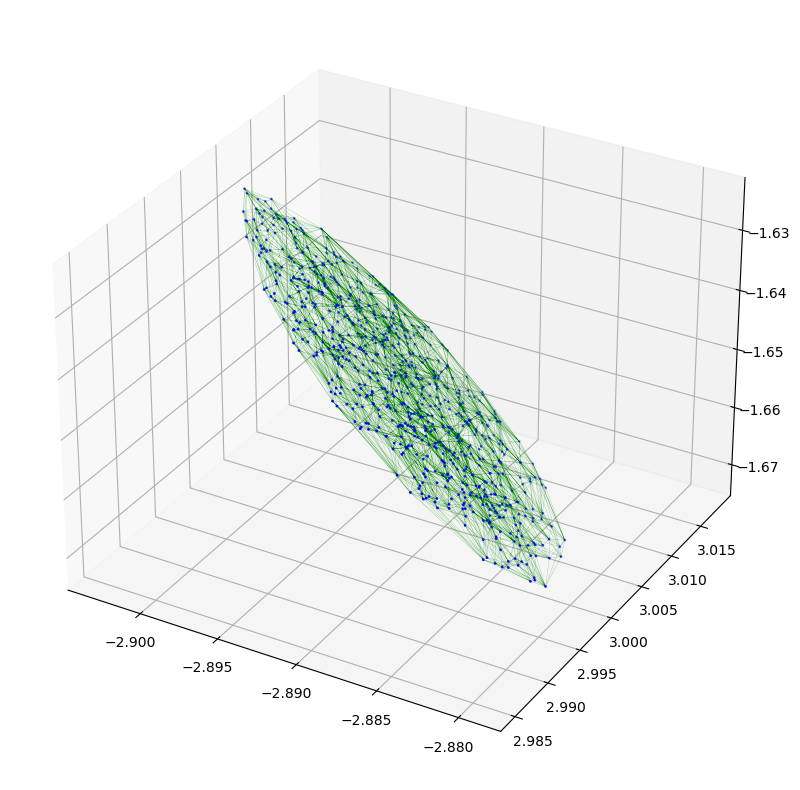

In [41]:
plot_del_3d(better_d3_vp, true_b_3d, int(2e3))


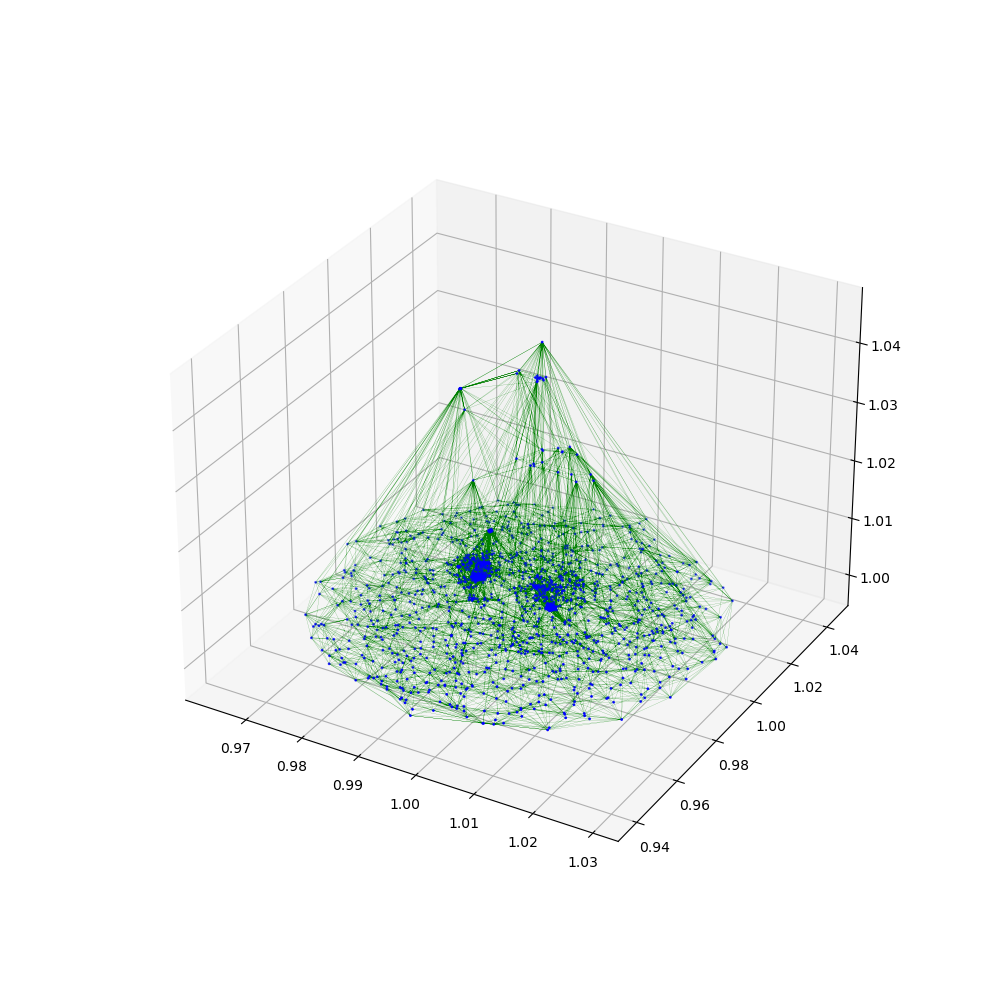

In [54]:
plot_del_3d(new_vp, true_cool_3d, int(2e3))

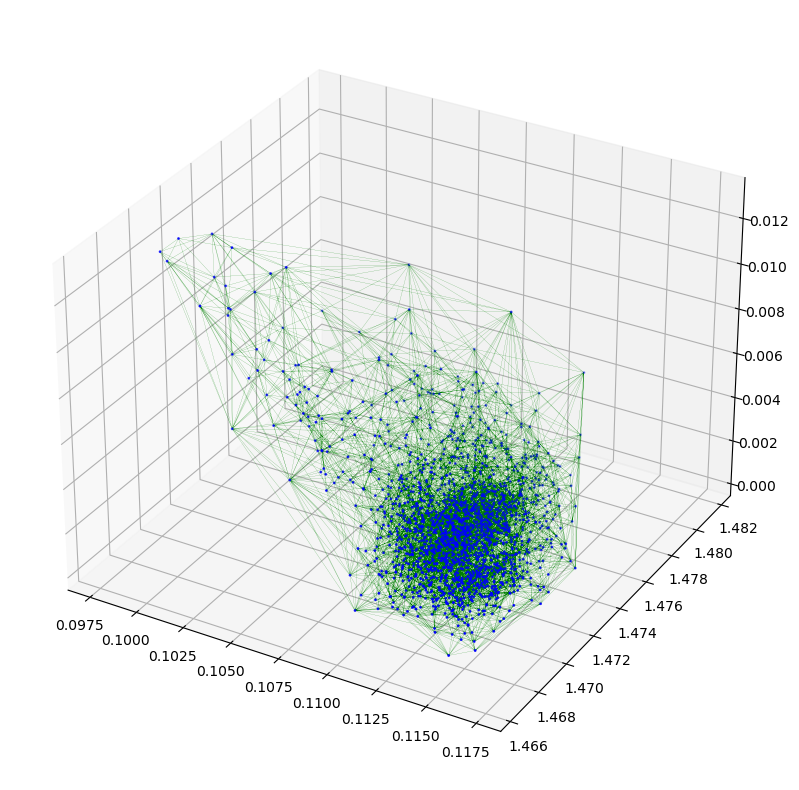

In [46]:
plot_del_3d(cool_vp, true_cool_3d, int(2e3))

In [48]:
def Del_integral_n_dim(vp, true_value, n_samples, num_clusts):
    start = time.process_time()
    samp = samples_above_threshold(vp, true_value, n_samples)
    print("samples_used", time.process_time() - start)
    if num_clusts == 0:
        integral = get_Delaunay_integral_n(vp, samp, num_clusts)
    else:
        make_data_features = getDataFeatures(samp)
        get_k_means = trykmeans(make_data_features, num_clusters, 5)
        clust = get_cluster_points(get_k_means)
        integral = get_Delaunay_integral_n(vp, clust, num_clusts)
    return integral

In [43]:
Del_integral_n_dim(doubly_peaked_vp, true_a_b, int(5e5), int(2))

samples_used 6.125825999999996


array([0.28421138])

In [44]:
Del_integral_n_dim(better_d3_vp, true_b_3d, int(5e5), num_clusts=0)

samples_used 12.347980000000007


array([0.07487533])

In [ ]:
Del_integral_n_dim(better_d3_vp, true_b_3d, int(5e5), num_clusts=1)

[-2.89037176  3.         -1.64865863]
[50557.25046559]
50557.250465588346


array([0.07488174])

In [47]:
Del_integral_n_dim(cool_vp, true_cool_3d, int(5e5), num_clusts=0)

samples_used 6.269002999999998


array([0.99894453])